<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:#dfe6e9; padding: 20px"> <h7 style="color:black; margin-bottom:20px">  Денис, привет! Это Михаил. Спасибо за работу)

Мои комментарии и замечания далее по тексту помечены различными цветами:
    
---    
<div class="alert alert-block alert-danger">
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
Когда всё сделано правильно.
</div>
    
---

Если возникнут вопросы по проекту или вопросы общего характера, то не стесняйся - задавай!) Для того, чтобы мне было легче их найти, то выделяй их пожалуйста с помощью цвета, например вот так - <font color=#e17055>"вопрос, который не останется незамеченным"</font>
    
Удачи!
    
p.s.: не удаляй мои замечания, если предстоит что то доработать в проекте.</h7>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

Итог ревью - ты проделал большую работу!. Есть четкая структура исследования, наглядные графики и логичные выводы. Но не хватает некоторых пунктов исследования. Оставил свои комментарии. Если возникнут вопросы, то всегда готов ответить) Буду ждать!
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Привет, Михаил! Благодарю за проверку работы и комментарии, они мне помогли "догнать" задачу, так как я вначале не уловил образ результата. Я внес исправления в свою работу, пометил их комментариями голубого цвета.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Привет. Все замечания учтены. Остался последний шаг - SQL
</div>

# A/B-тестирование

**Задача:**

провести оценку результатов A/B-теста. В нашем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

**Что необходимо сделать:**
- Оценить корректность проведения теста
- Проанализировать результаты теста

**Чтобы оценить корректность проведения теста, проверим:**

- пересечение тестовой аудитории с конкурирующим тестом,
- совпадение теста и маркетинговых событий, другие проблемы временных границ теста.

**Техническое задание**

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

**Данные**

[ab_project_marketing_events.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/82e86f15-c03e-4008-8e5e-19f672168027/final_ab_marketing_events.csv)

[final_ab_new_users.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/7ba90abe-6cfd-4403-982e-1fd7d7cdb607/final_ab_new_users.csv)

[final_ab_events.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/cca72975-1722-4600-908d-e3941dbb727e/final_ab_events.csv)

[final_ab_participants.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/833205e1-e4c9-46dc-beb0-ddc639cbe6fd/final_ab_participants.csv)

**Описание данных**

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

Структура файла:

- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

Структура файла:

- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

`final_ab_participants.csv` — таблица участников тестов.

Структура файла:

- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.


**Алгоритм выполнения работы**

- Опишем цели исследования
- Исследуем данные:
    - Определим, требуется ли преобразование типов
    - Опишем природу пропущенных значений и дубликатов при их обнаружении.
- Проведем исследовательский анализ данных:
    - Как меняется конверсия в воронке на разных этапах?
    - Количество событий на пользователя одинаково распределены в выборках?
    - В выборках встречаются одни и те же пользователи?
    - Как число событий распределено по дням?
    - Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?
- Оценим результаты A/B-тестирования
    - Что можно сказать про результаты A/В-тестирования?
    - Проверим статистическую разницу долей z-критерием.
- Опишем выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования.

## Загрузим данные и изучим их

In [97]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set(color_codes=True)
import math as mth
from plotly import graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
#сохраним данные в переменных
marketing_events = (pd.read_csv
                    ('https://raw.githubusercontent.com/denisamoilov/learning/main/ab_project_marketing_events.csv')
                   )
new_users = pd.read_csv('https://raw.githubusercontent.com/denisamoilov/learning/main/final_ab_new_users.csv')
final_events = pd.read_csv('https://raw.githubusercontent.com/denisamoilov/learning/main/final_ab_events.csv')
final_participants = pd.read_csv('https://raw.githubusercontent.com/denisamoilov/learning/main/final_ab_participants.csv')

In [3]:
#посмотрим общую информацию о таблцах
display(marketing_events.head())
print('Общая информация о таблице с данными календаря маркетинговых событий за 2020 год')
print(marketing_events.info())

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


Общая информация о таблице с данными календаря маркетинговых событий за 2020 год
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes
None


In [4]:
#посмотрим общую информацию о таблцах
display(new_users.head())
print('Общая информация о таблице с данными о пользователях, зарегистрировавшихся с 7 по 21 декабря 2020 года.')
print(new_users.info())

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


Общая информация о таблице с данными о пользователях, зарегистрировавшихся с 7 по 21 декабря 2020 года.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB
None


In [5]:
#посмотрим общую информацию о таблцах
display(final_events.head())
print('Общая информация о таблице с данными о действиях пользователей, зарегистрировавшихся с 7 по 21 декабря 2020 года.')
print(final_events.info())

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Общая информация о таблице с данными о действиях пользователей, зарегистрировавшихся с 7 по 21 декабря 2020 года.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
None


In [6]:
#посмотрим общую информацию о таблцах
display(final_participants.head())
print('Общая информация о таблице с данными участников теста')
print(final_participants.info())

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


Общая информация о таблице с данными участников теста
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB
None


При первом ознакомлении с данными обнаружен неверный тип даты во всех 4-х таблицах. Пропуски обнаружены в столбце details в таблице final_events

In [7]:
#проверим наличие дубликатов
print("Количество дубликатов в таблице marketing_events", marketing_events.duplicated().sum())
print("Количество дубликатов в таблице new_users", new_users.duplicated().sum())
print("Количество дубликатов в таблице final_events", final_events.duplicated().sum())
print("Количество дубликатов в таблице final_participants", final_participants.duplicated().sum())

Количество дубликатов в таблице marketing_events 0
Количество дубликатов в таблице new_users 0
Количество дубликатов в таблице final_events 0
Количество дубликатов в таблице final_participants 0


In [8]:
#изучим причину пропусков в таблице final_events
#посотрим уникальные значения в столбце с именами событий
print(final_events['event_name'].value_counts())

#указаны события, которые совершают пользователи, в столбце details указаны суммы, что может относиться к событияю purchase
display(final_events.groupby('event_name')['details'].count())

login           189552
product_page    125563
purchase         62740
product_cart     62462
Name: event_name, dtype: int64


event_name
login               0
product_cart        0
product_page        0
purchase        62740
Name: details, dtype: int64

In [9]:
#проверим есть ли пользователи попавшие  обе группы и в оба теста

final_participants_check = final_participants.groupby(['user_id', 'ab_test']).agg({'group': 'nunique'}).reset_index()
display(final_participants_check.sort_values(by = 'group', ascending = False).head())

final_participants_double = final_participants_check[final_participants_check['group'] == 2]
display(final_participants_double.head())
print("Количество пользователей, попавших в обе группы в обоих тестах", final_participants_double['user_id'].count())
print('Доля дубликатов {:.1%}'.format(final_participants_double['user_id'].count() / final_participants['user_id'].value_counts().sum()))

,user_id,ab_test,group
0,0002CE61FF2C4011,interface_eu_test,1
12177,AA302D044EB2BED4,recommender_system_test,1
12183,AA55A2BDAE39BECC,recommender_system_test,1
12182,AA559B5A4F3F5E61,recommender_system_test,1
12181,AA49424D3F80982D,interface_eu_test,1


,user_id,ab_test,group


Количество пользователей, попавших в обе группы в обоих тестах 0
Доля дубликатов 0.0%


### Вывод

При первом ознакомлении с данными обнаружен неверный тип даты во всех 4-х таблицах. Пропуски обнаружены в столбце details в таблице final_events, в этом столбце указаны суммы покупок, поэтому информация есть только для этого события. Дубликатов не обнаружено. На следующем шаге нужно исправить типы данных и проверить ошибки в последовательности совершаемых событий. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

На этом этапе всё хорошо - посмотрел данные и выполнил первичную проверку на пропуски и дубликаты. Идем дальше)
   
</div>

_______________________________________________________________________________________________________________________________

## Предобработка данных

In [10]:
#исправим тип данных в датах
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
final_events['event_dt'] = pd.to_datetime(final_events['event_dt'])

In [44]:
#заменим пропуски в столбце со стоимостью заказов на 0
final_events['details'] = final_events['details'].fillna(0)

In [45]:
#посмотрим общую информацию о таблцах
print('Общая информация о таблице с данными календаря маркетинговых событий за 2020 год')
print(marketing_events.info())

print('Общая информация о таблице с данными о пользователях, зарегистрировавшихся с 7 по 21 декабря 2020 года.')
print(new_users.info())

print('Общая информация о таблице с данными о действиях пользователей, зарегистрировавшихся с 7 по 21 декабря 2020 года.')
print(final_events.info())

print('Общая информация о таблице с данными участников теста')
print(final_participants.info())

Общая информация о таблице с данными календаря маркетинговых событий за 2020 год
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null datetime64[ns]
finish_dt    14 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None
Общая информация о таблице с данными о пользователях, зарегистрировавшихся с 7 по 21 декабря 2020 года.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB
None
Общая информация о таблице с данными о действиях пользователей, зарегистрировавшихся с 7 по 21 декабря 2020 года.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entri

In [46]:
#проверим ошибки в последовательности действий пользователей
user_first_event = (final_events.pivot_table(index=['user_id', 'event_name'], values='event_dt',
                                             aggfunc='min').sort_values('event_dt')
                   )
display(user_first_event.head(20))


event_dt
user_id          event_name                      
EB2D1E4A76B38E24 purchase     2020-12-07 00:00:33
                 login        2020-12-07 00:00:33
                 product_page 2020-12-07 00:00:34
821D82C2BB74CBB2 product_page 2020-12-07 00:00:35
                 login        2020-12-07 00:00:35
CB807128858C6274 login        2020-12-07 00:01:19
7F256CA122A4084C login        2020-12-07 00:01:37
                 product_cart 2020-12-07 00:01:38
                 product_page 2020-12-07 00:01:40
E4BF0599D6E802CA login        2020-12-07 00:02:46
                 purchase     2020-12-07 00:02:46
                 product_page 2020-12-07 00:02:47
B13A53A1EB2038EE login        2020-12-07 00:02:48
4C4BA430AAA820F8 login        2020-12-07 00:03:18
                 product_page 2020-12-07 00:03:19
09F174B3F246A000 login        2020-12-07 00:03:29
                 product_cart 2020-12-07 00:03:29
C967DB4C341410A5 product_cart 2020-12-07 00:03:43
                 login        2020-12-07 00:03:43
                 product_page 2020-12-07 00:03:45

### Вывод

Преобразовыны типы данных в столбцах с датой. Обнаружены ошибки в последовательности событий. Например, у пользователя EB2D1E4A76B38E24 событие оплаты стоит одновременно с авторизацией и до просмотра страницы продукта. У других пользователей также наблюдается неверный порядок событий, что может говорить об ошибке сбора данных.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

Какого рода ошибки? И почему ты считаешь это ошибкой. Хотелось бы больше пояснений
   
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Поправил вывод 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Не только об ошибке. Здесь надо уточнять момент. Возможно на платформе нестрогая воронка продаж и есть возможности приобрести товар напрямуюЮ, минуя некоторые этапы
</div>

_______________________________________________________________________________________________________________________________

## Исследовательский анализ данных

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Этот раздел я полностью переделал
</div>

По техничекому заданию извстно, что тест запущен 2020-12-07, дата остановки набора новых пользователей: 2020-12-21, дата остановки теста: 2021-01-04. Цель теста - 15% новых пользователей из Евросоюза. Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы. Ожидаемое количество участников теста 6000 пользователей в обеих группах. Ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%.

Проведем исследовательский анализ данных:
* Как меняется конверсия в воронке на разных этапах?
* Количество событий на пользователя одинаково распределены в выборках?
* В выборках встречаются одни и те же пользователи?
* Как число событий распределено по дням?
* Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

### Проверим данные по условию технического задания

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Новый раздел ниже
</div>

In [47]:
#проверим за какоей период у нас есть данные
#сохраним дату
final_events['event_date'] = pd.DatetimeIndex(pd.to_datetime(final_events['event_dt'], format = '%Y.%m.%d')).date
final_events['event_date'] = pd.to_datetime(final_events['event_date'])
display(final_events.head(1))

#посмотрим, за какой период у нас есть данные
print('Период, за которые у нас есть данные в таблице с логами')
print(final_events['event_date'].min(), '-', final_events['event_date'].max())

print('Период, за которые у нас есть данные в таблице с данными о новых пользователях')
print(new_users['first_date'].min(), '-', new_users['first_date'].max())

,user_id,event_dt,event_name,details,event_date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07


Период, за которые у нас есть данные в таблице с логами
2020-12-07 00:00:00 - 2020-12-30 00:00:00
Период, за которые у нас есть данные в таблице с данными о новых пользователях
2020-12-07 00:00:00 - 2020-12-23 00:00:00


Данные в логах есть только до 30 декабря 2020 года, при этом тест был остановлен только 4 января 2021 года. Фактически не хватает данных для теста за 5 дней. Набор пользователей фактически был остановлен 23 декабря 2020 года вместо 21 декабря, как это предусмотрено ТЗ

In [48]:
#узнаем количество новых пользователей из Евросоюза
user_region = (new_users.groupby('region')['user_id'].nunique().reset_index()
               .rename({'user_id':'users_count'}, axis = 1)
              )
#посчитаем долю пользователей по регионам
user_region['users%'] = (user_region['users_count'] / user_region['users_count'].sum() *100).round(1)

display(user_region)

,region,users_count,users%
0,APAC,3153,5.1
1,CIS,3155,5.1
2,EU,46270,75.0
3,N.America,9155,14.8


Требование ТЗ в 15% новых пользователей из Евросоюза выполнено, из этого региона у наc 75%

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Не совсем. В этом пункте имеется в виду, что доля новых пользователей в тесте recommender_system_test из EU оставляет 15%
</div>

In [49]:
##узнаем необходимое количество пользователей в тесте recommender_system_test
#узнаем, данные о каких тестах у нас есть
print('Названия тестов', final_participants['ab_test'].unique())

Названия тестов ['recommender_system_test' 'interface_eu_test']


У нас есть данные о двух проведенных тестах, recommender_system_test - тот, который интересует нас в рамках ТЗ и interface_eu_test - видимо тест, который качается изменения интфейса для пользователей Евросоюза

,group,ab_test,user_id
0,A,interface_eu_test,5831
1,A,recommender_system_test,3824
2,B,interface_eu_test,5736
3,B,recommender_system_test,2877


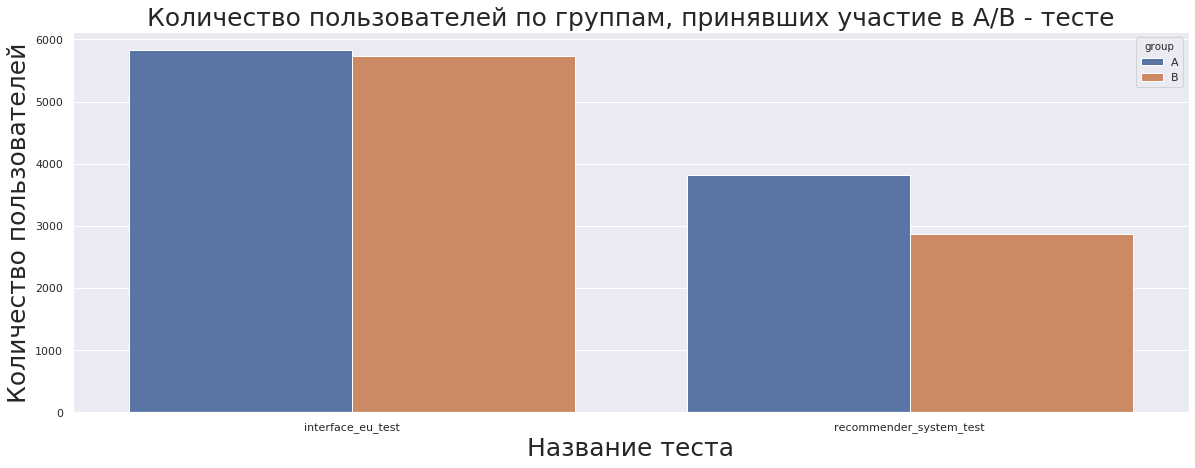

group,A,B,test_users_count,difference_%
ab_test,,,,
interface_eu_test,5831,5736,11567,1.63
recommender_system_test,3824,2877,6701,24.76


In [50]:
#узнаем количество пользователей в каждом тесте
count_group = final_participants.groupby(['group', 'ab_test']).agg({'user_id': 'nunique'}).reset_index()

display(count_group)

#построим график количетва пользователей в группах
plt.figure(figsize = (20, 7))
sns.barplot(data = count_group, x = 'ab_test', y = 'user_id', hue = 'group')
plt.xlabel("Название теста", fontsize = 25)
plt.ylabel("Количество пользователей", fontsize = 25)
plt.title("Количество пользователей по группам, принявших участие в A/B - тесте", fontsize = 25)
plt.show()

#посомтрим насколко отличается количество пользоватеей в каждой группе в каждом тесте
test_pivot = count_group.pivot_table(index = 'ab_test', columns = 'group', values = 'user_id')
test_pivot['test_users_count'] = test_pivot['A'] + test_pivot['B']
test_pivot['difference_%'] = (100 - (test_pivot['B'] / test_pivot['A'] * 100)).round(2)
display(test_pivot)

Количество пользователей, принявших участие в тестах различается. Есть различия и в группах в каждом тесте, в тесте interface_eu_test разница в количестве польователей составляет 3,6%, что является незначительным показателем для проведения анализа, а в тесте recommender_system_test разница составялет почти 25%, при этом у нас набирается необходимое количество пользователей: 6701

In [51]:
#проверим, есть ли пользователи, принявшие участие в обоих тестах 
two_tests = final_participants.groupby('user_id').agg({'ab_test':'count'}).reset_index()

#создаем список пользователей, участвовавших в двух тестах
two_tests_users = two_tests[two_tests['ab_test'] == 2]['user_id']

print('Количество пользователей, принявших участие в обоих тестах', two_tests_users.count())

Количество пользователей, принявших участие в обоих тестах 1602


У нас есть пользователи, которые приняли участие в обоих тестах, это означает, что интересующая нас конверсия в тесте recommender_system_test могла возникнуть от второго теста, учитывая, что в нашем фокусе пользователи из Евросоюза, а тест, судя по названию проводился там же. Считаю, что необходимо очистить выборку от этих пользователей и еще раз посмотреть на данные по количеству пользователей в тестах. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Всё верно по расчетам, но не совсем согласен с решением исключить данных пользователей. В реальной практике при такой ситуации  надо идти к заказчикам и объяснять ситуацию, а там уже решать, что делать с этими пользователями. 
    
Удаление данных это самая крайняя мера, когда других вариантов нет. Также стоит учитывать, что чистого теста добиться в реальной жизни сложно и в любом случае какие то внешние факторы будут влиять на пользователей.
    
Наиболее корректным вариантом является проверка, в какие именно группы теста interface_eu_test попали пользователи теста recommender_system_test. Ведь если они попали только в контрольную группу - это значит, что тест interface_eu_test никак на них не повлиял
</div>

In [52]:
#сохраним пользователей, попавших в оба теста в список
two_tests_users = list(two_tests_users)

#почистим таблицу с данными о тестировании
final_participants_clean = final_participants.query('user_id != @two_tests_users')

print(final_participants_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15064 entries, 0 to 18267
Data columns (total 3 columns):
user_id    15064 non-null object
group      15064 non-null object
ab_test    15064 non-null object
dtypes: object(3)
memory usage: 470.8+ KB
None


,group,ab_test,user_id
0,A,interface_eu_test,5012
1,A,recommender_system_test,2903
2,B,interface_eu_test,4953
3,B,recommender_system_test,2196


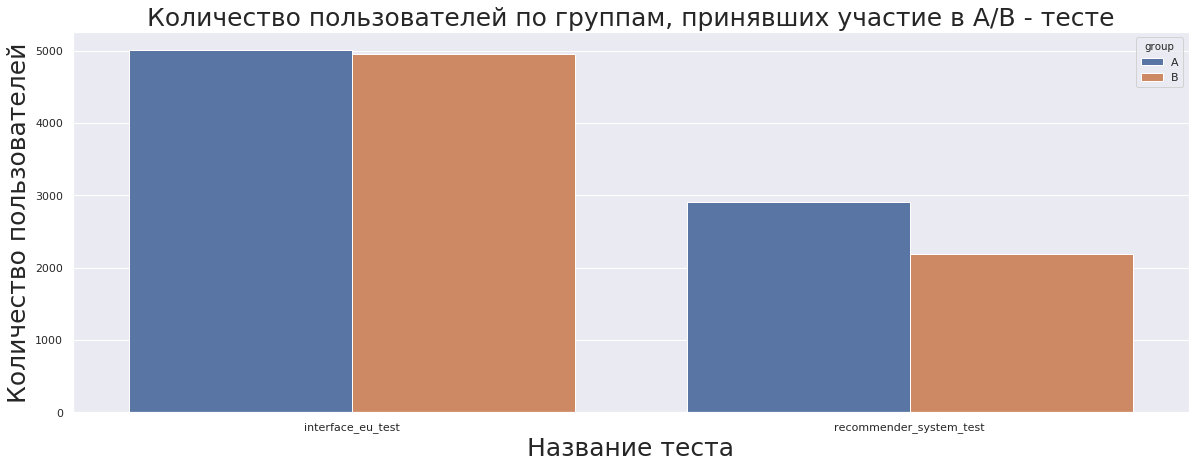

group,A,B,test_users_count,difference_%
ab_test,,,,
interface_eu_test,5012,4953,9965,1.18
recommender_system_test,2903,2196,5099,24.35


In [53]:
#проверим еще раз данные по пользователям
#узнаем количество пользователей в каждом тесте
count_group = final_participants_clean.groupby(['group', 'ab_test']).agg({'user_id': 'nunique'}).reset_index()

display(count_group)

#построим график количетва пользователей в группах
plt.figure(figsize = (20, 7))
sns.barplot(data = count_group, x = 'ab_test', y = 'user_id', hue = 'group')
plt.xlabel("Название теста", fontsize = 25)
plt.ylabel("Количество пользователей", fontsize = 25)
plt.title("Количество пользователей по группам, принявших участие в A/B - тесте", fontsize = 25)
plt.show()

#посомтрим насколко отличается количество пользоватеей в каждой группе в каждом тесте
test_pivot = count_group.pivot_table(index = 'ab_test', columns = 'group', values = 'user_id')
test_pivot['test_users_count'] = test_pivot['A'] + test_pivot['B']
test_pivot['difference_%'] = (100 - (test_pivot['B'] / test_pivot['A'] * 100)).round(2)
display(test_pivot)

После очистки данных у нас количество пользователей в интересующем тесте 5099, что почти на 1000 меньше, чем сказано в ТЗ

In [54]:
#посомотрим какие маркетинговые события происходили в период проведения теста
#сделаем срез податам проведения теста
marketing_events_period = marketing_events.query('start_dt >= "2020-12-21" and finish_dt <= "2021-01-04"')
marketing_events_period['timedelta'] = marketing_events_period['finish_dt'] - marketing_events_period['start_dt']
display(marketing_events_period)

,name,regions,start_dt,finish_dt,timedelta
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,9 days


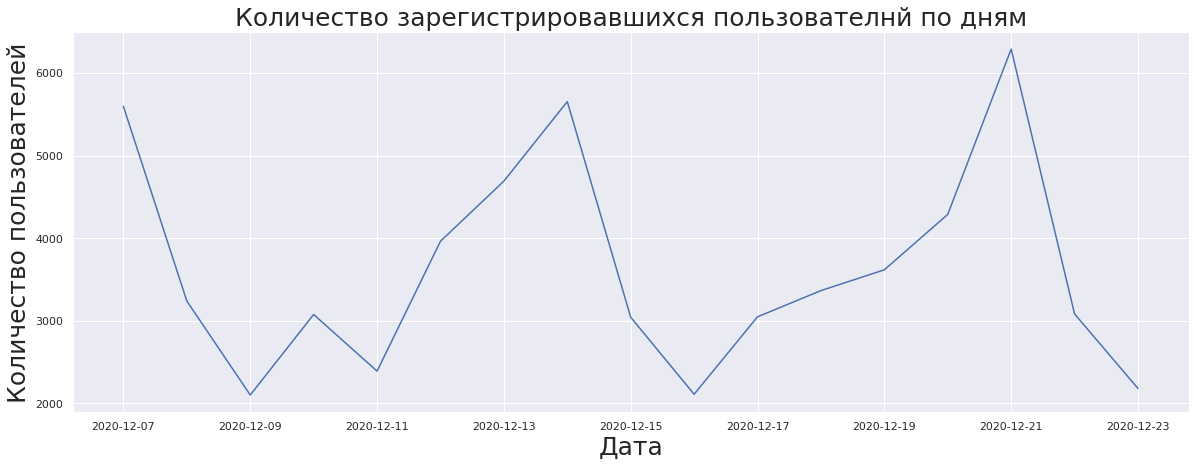

In [68]:
#проверим распредление дат регистраций пользователей
new_users_count = new_users.groupby('first_date')['user_id'].count().reset_index()

plt.figure(figsize = (20, 7))
sns.lineplot(data = new_users_count, x = 'first_date', y = 'user_id')
plt.xlabel("Дата", fontsize = 25)
plt.ylabel("Количество пользователей", fontsize = 25)
plt.title("Количество зарегистрировавшихся пользователнй по дням", fontsize = 25)
plt.show()


В период проведения теста проводилась рождественская промо-акция,  которая длилась 9 дней в период с 25 декабря 2020 год по 3 января 2021 года. 

#### Вывод

При проверки данных на соответствие требованиям ТЗ удалось обнаружить следующее:

* Данные в логах есть только до 30 декабря 2020 года, при этом тест был остановлен только 4 января 2021 года. Фактически не хватает данных для теста за 5 дней. Набор пользователей фактически был остановлен 23 декабря 2020 года вместо 21 декабря, как это предусмотрено ТЗ
* Требование ТЗ в 15% новых пользователей из Евросоюза выполнено, из этого региона у наc 75%
* У нас есть данные о двух проведенных тестах, recommender_system_test - тот, который интересует нас в рамках ТЗ и interface_eu_test - видимо тест, который качается изменения интфейса для пользователей Евросоюза. Есть различия и в группах в каждом тесте, в тесте interface_eu_test разница в количестве польователей составляет 3,6%, что является незначительным показателем для проведения анализа, а в тесте recommender_system_test разница составялет почти 25%, при этом у нас набирается необходимое количество пользователей: 6701 
* Есть пользователи, которые приняли участие в обоих тестах, это означает, что интересующая нас конверсия в тесте recommender_system_test могла возникнуть от второго теста, учитывая, что в нашем фокусе пользователи из Евросоюза, а тест, судя по названию проводился там же. Провели очистки данных от таких пользователей, после которой количество пользователей в интересующем тесте 5099, что почти на 1000 меньше, чем сказано в ТЗ
* В период проведения теста проводилась рождественская промо-акция, которая длилась 9 дней в период с 25 декабря 2020 год по 3 января 2021 года, которая могла повлиять на окупательскую активность пользователей, в т.ч. из Евросоюза.

**Резюме**

У нас фактически есть данные для теста с 23 по 30 декабря 2020 года, т.е. 7 дней, а не 14, общее количество пользователей 5099, что меньше, чем тредуется ТЗ. Высокая разница между группамми А и B в тесте. В период теста проводилась маркетинговая акция, которая могла повлиять на покупательскую активность в обеих группах. Необходимо либо уточнить ТЗ, либо переделать тест. Проведем дополнительный анализ данных.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

Здесь я тебе советую сначала проверить данные по условию ТЗ. Корректно ли был произведен сбор данных (т.к. не ты этим занимался), а потом уже исследовать эти данные по обозначенным пунктам
   
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Добавил эту часть выше
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Грамотно проведенный этап. Хорошее дополнгение. Молодец!
</div>

### Изменение конверсии в воронке на разных этапах

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

<s>Ты проводишь сейчас анализ по всем данным, когда нас интересует только определенная группа пользователей, участвующих в тесте recommender_system_test. Поэтому надо будет дальнейший анализ подкорректировать
   
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Сделал необходимый срез
</div>

In [74]:
#сделаем срез в данных по параметрам ТЗ
#пользователи из Евросоюза
eu_users = list(new_users[new_users['region'] == 'EU']['user_id'])
#данные о тесте
recommender_test = final_participants_clean[final_participants_clean['ab_test'] == 'recommender_system_test']

#проверим, нет ли одних и тех же пользователей в разных группах
recommender_test_check = recommender_test.groupby(['user_id', 'ab_test']).agg({'group': 'nunique'}).reset_index()
display(recommender_test_check.sort_values(by = 'group', ascending = False).head())

recommender_test_double = recommender_test_check[recommender_test_check['group'] == 2]
display(recommender_test_double.head())
print("Количество пользователей, попавших в обе группы в обоих тестах", recommender_test_double['user_id'].count())
print('Доля дубликатов {:.1%}'.format(recommender_test_double['user_id'].count() / recommender_test['user_id'].value_counts().sum()))

#сделаем срез по пользователям из евросоюза
final_events_eu = final_events.query('user_id == @eu_users')

#объединим итоговые данные с данными теста. так, чтобы остались пользователи, принявшие участие в тесте
data = final_events_eu.merge(recommender_test, on = 'user_id')

display(user_data.head())
print(user_data.info())

,user_id,ab_test,group
0,000ABE35EE11412F,recommender_system_test,1
3396,AA116D67C4F48D50,recommender_system_test,1
3403,AA55A2BDAE39BECC,recommender_system_test,1
3402,AA559B5A4F3F5E61,recommender_system_test,1
3401,AA493C70B4CA47F6,recommender_system_test,1


,user_id,ab_test,group


Количество пользователей, попавших в обе группы в обоих тестах 0
Доля дубликатов 0.0%


,user_id,event_dt,event_name,details,event_date,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,A,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17526 entries, 0 to 17525
Data columns (total 7 columns):
user_id       17526 non-null object
event_dt      17526 non-null datetime64[ns]
event_name    17526 non-null object
details       17526 non-null float64
event_date    17526 non-null datetime64[ns]
group         17526 non-null object
ab_test       17526 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.1+ MB
None


In [83]:
#отфильтрумем данные по 14-дневному сроку с момента регисттрации
#добавим к данным с логами столбец с датой регистрации
user_data = data.merge(new_users[['user_id', 'first_date']], on = 'user_id')
#посчитаем таймдельту для событий и первой регистрации
user_data['timedelta'] = user_data['event_date'] - user_data['first_date']
#сделам срез по таймдельте, уберем данные, если таймдельта больше 14 дней
user_data = user_data.query('timedelta <= "14 days"')
display(user_data.head())

,user_id,event_dt,event_name,details,event_date,group,ab_test,first_date,timedelta
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,A,recommender_system_test,2020-12-07,0 days
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,A,recommender_system_test,2020-12-07,2 days
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,A,recommender_system_test,2020-12-07,0 days
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,A,recommender_system_test,2020-12-07,1 days
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,A,recommender_system_test,2020-12-07,2 days


In [84]:
#узнаем количество уникальных пользователей
print('Количество пользователей из Евросоюза, принявших участие в тесте', user_data['user_id'].nunique())

Количество пользователей из Евросоюза, принявших участие в тесте 2594


In [85]:
#узнаем за какой период у нас есть данные
print('Период, за который у нас есть данные', user_data['event_date'].min(), user_data['event_date'].max())

Период, за который у нас есть данные 2020-12-07 00:00:00 2020-12-29 00:00:00


Общее количество событий в логе 17087


,event_name,event_count
0,login,7694
1,product_cart,2305
2,product_page,4794
3,purchase,2294


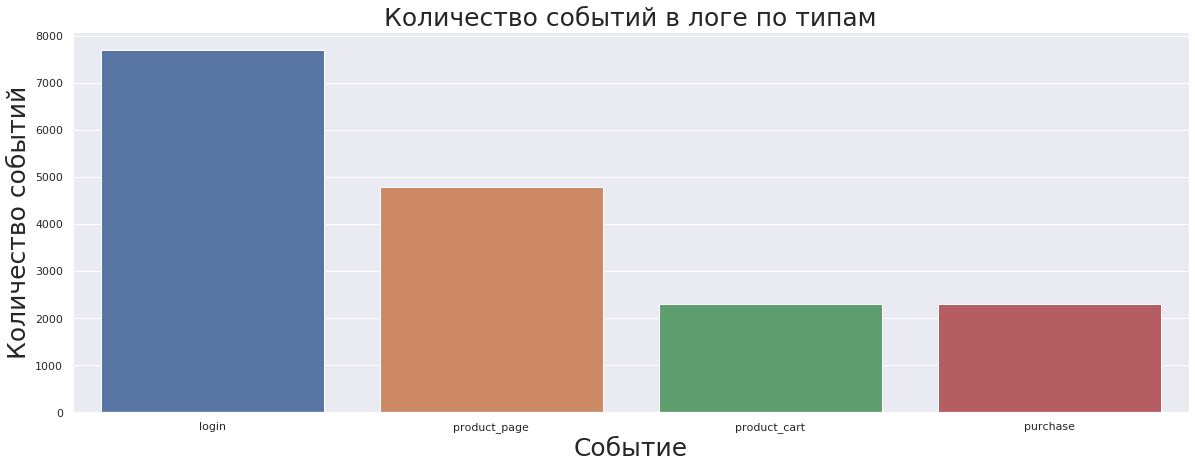

In [86]:
#посчитаем общее количество событий в логе в т.ч. по типам
print('Общее количество событий в логе', user_data['event_name'].count())

group_event = user_data.groupby('event_name')['user_id'].count().reset_index().rename({'user_id':'event_count'}, axis = 1)
display(group_event)

#построим график количетва событий в логе
plt.figure(figsize = (20, 7))
sns.barplot(data = group_event.sort_values(by = 'event_count', ascending = False), x = 'event_name', y = 'event_count')
plt.xlabel("Событие", fontsize = 25)
plt.ylabel("Количество событий", fontsize = 25)
plt.title("Количество событий в логе по типам", fontsize = 25)
plt.show()

По количеству события распределелись в следующем порядке: вход - просмотр страницы продукта - покупка - корзина. Причем, здесь, видмо есть ошибка, так как добавление продукта в корзину обычно предшествует оплате

In [87]:
#посмотрим сколько в среднем событий приходиться на пользовтеля
group_event['event_mean_user'] = (group_event['event_count'] / user_data['user_id'].nunique()).round(0)
display(group_event)

,event_name,event_count,event_mean_user
0,login,7694,3.0
1,product_cart,2305,1.0
2,product_page,4794,2.0
3,purchase,2294,1.0


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

А зачем округлять среднее значение? Так ты теряешь часть информации
</div>

В среднем на 1 пользователя приходится 3 авторизации, 2 прсмотра страницы продукта и по 1 добавлению товара в корзину и оплата его

In [88]:
#посчитаем конверсию по событиям по всем пользователям
funnel = (user_data.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
          .to_frame().reset_index().rename(columns={'user_id': 'total_users'})
         )

funnel['percent%'] = (funnel['total_users'] / user_data['user_id'].nunique() * 100).round()
display(funnel)

fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = funnel['event_name'],
    x = funnel['percent%']))
fig.show()

,event_name,total_users,percent%
0,login,2593,100.0
1,product_page,1632,63.0
2,purchase,804,31.0
3,product_cart,773,30.0


Только 30-31% всех пользователей доходит до добавления товара в корзину и оплаты. 

In [89]:
a = user_data[(user_data['group'] == 'A')]
b = user_data[(user_data['group'] == 'B')]
funnel_a = a.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'total_users'})
funnel_a['percent%'] = (funnel_a['total_users'] / a['user_id'].nunique() * 100).round()

funnel_b = b.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()\
        .rename(columns={'user_id': 'total_users'})
funnel_b['percent%'] = (funnel_b['total_users'] / b['user_id'].nunique() * 100).round()

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'a',
    y = funnel_a['event_name'],
    x = funnel_a['percent%'],
    ))

fig.add_trace(go.Funnel(
    name = 'b',
    y = funnel_b['event_name'],
    x = funnel_b['percent%'],
    ))

fig.show()

Сравнили конверсию по группам. По данным конверсия группы B немного меньше, чем в группе А, при этом, вано учитывать, что в группе B у нас пользователей на 25% меньше. 

### Распределение количества событий на пользователя в выборках

,event_name,group,event_count
0,login,A,5963
1,login,B,1731
2,product_cart,A,1826
3,product_cart,B,479
4,product_page,A,3873
5,product_page,B,921
6,purchase,A,1827
7,purchase,B,467


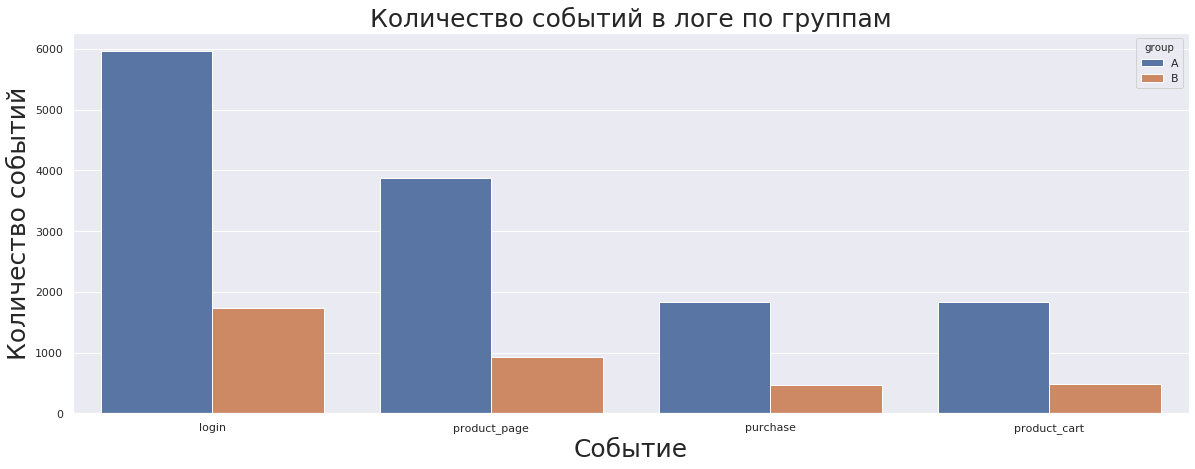

In [90]:
#посчитаем количество событий по типам для групп по тестам
events_tests = (user_data.groupby(['event_name', 'group'])['user_id'].count().reset_index()
                .rename({'user_id': 'event_count'}, axis = 1)
               )

display(events_tests)

#построим график 

plt.figure(figsize = (20, 7))
sns.barplot(data = events_tests.sort_values(by = 'event_count', ascending = False), x = 'event_name', y = 'event_count', hue = 'group')
plt.xlabel("Событие", fontsize = 25)
plt.ylabel("Количество событий", fontsize = 25)
plt.title("Количество событий в логе по группам", fontsize = 25)
plt.show()

Мы видим, что событий в логе по группе B существенно меньше, чем по группе A

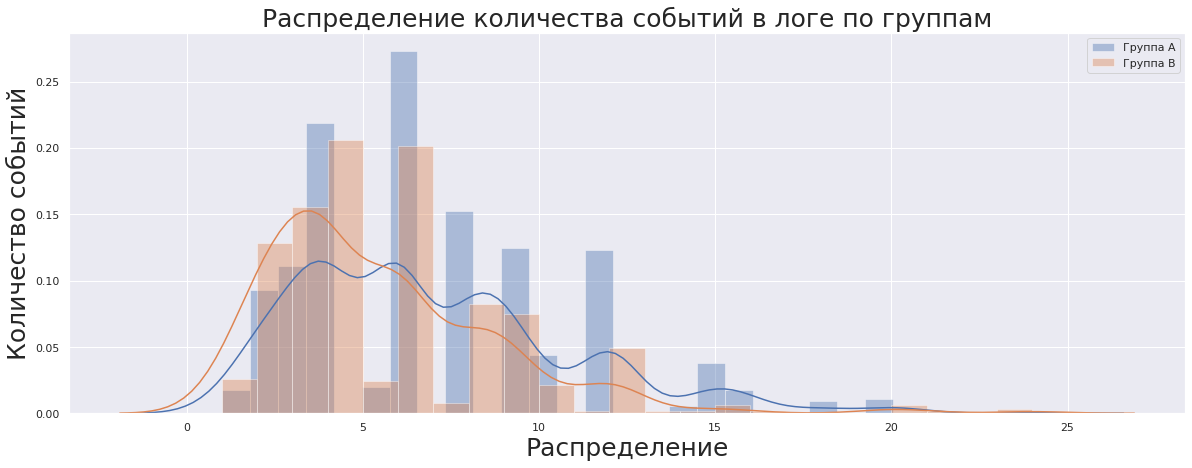

In [91]:
#посмотрим распределение событий на пользователя
user_test_event = (user_data.groupby(['user_id', 'group', 'ab_test'])['event_name'].count().reset_index()
                   .rename({'event_name': 'event_count'}, axis = 1)
                  )

plt.figure(figsize = (20, 7))
sns.distplot(user_test_event[user_test_event['group'] == "A"]['event_count'])
sns.distplot(user_test_event[user_test_event['group'] == "B"]['event_count'])
plt.xlabel("Распределение", fontsize = 25)
plt.ylabel("Количество событий", fontsize = 25)
plt.title("Распределение количества событий в логе по группам", fontsize = 25)
plt.legend(['Группа А', 'Группа B'])
plt.show()

Распределение нормальное, есть хвост в сторону максимлаьных значений. В среднем на пользователя в обеих группах приходиться 6 событий. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

<s>Другой тест нас вообще не интересует, только в плане есть ли с ним пересечение пользователей
   
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Сделал срез
</div>

### Узнаем, как число событий распределено по дням

In [92]:
events_day = (user_data.groupby(['event_date', 'event_name'])['user_id'].count().reset_index()
              .rename({'user_id': 'event_count'}, axis = 1)
             )
display(events_day.head())

,event_date,event_name,event_count
0,2020-12-07,login,217
1,2020-12-07,product_cart,56
2,2020-12-07,product_page,142
3,2020-12-07,purchase,74
4,2020-12-08,login,189


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 
    
Чтобы скрыть все warnings, можно использовать следующую конструкцию
```
import warnings
warnings.filterwarnings('ignore')
```

Так предупреждения не будут мешать читать твой проект
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Спасибо
</div>

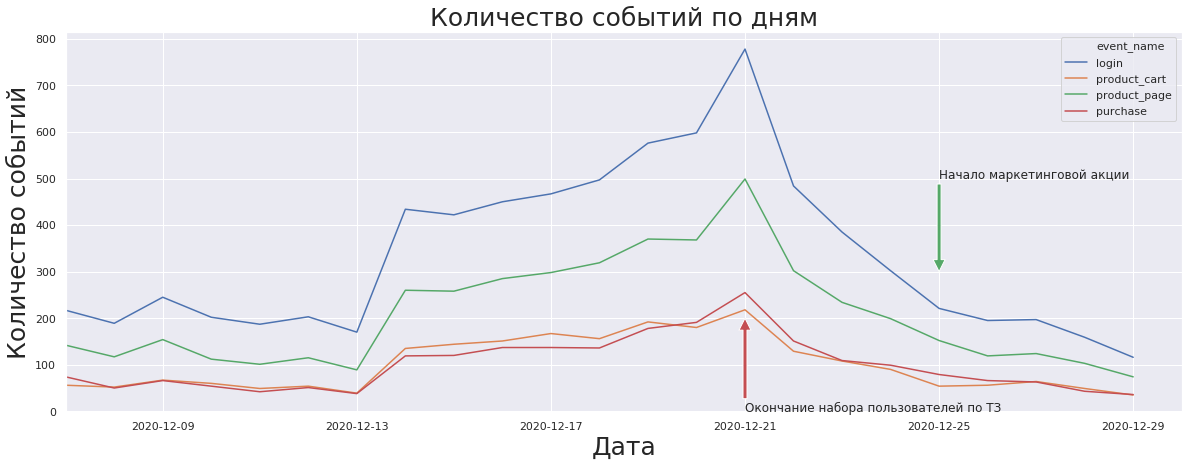

In [93]:
#Построим график распределение событий по дням
plt.figure(figsize = (20, 7))
sns.lineplot(data = events_day, x = 'event_date', y = 'event_count', hue = 'event_name')
plt.xlim(pd.to_datetime('2020-12-07'),
        pd.to_datetime('2020-12-30'))
plt.xlabel("Дата", fontsize = 25)
plt.ylabel("Количество событий", fontsize = 25)
plt.title("Количество событий по дням", fontsize = 25)
plt.annotate('Начало маркетинговой акции', xy=('2020-12-25', 300), xytext=('2020-12-25', 500),
            arrowprops=dict(facecolor='g'))
plt.annotate('Окончание набора пользователей по ТЗ', xy=('2020-12-21', 200), xytext=('2020-12-21', 0),
            arrowprops=dict(facecolor='r')) 
plt.show()

Пик событий приходится на 21 декабря 2020 года,  когда был окончен набор пользователей о ТЗ. После этого идет постепенное снижение активности пользователей. Маркетинговая акция незначительно, но повлияла на увеличение количества всех событий, однако роста покупок это не принесло. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

<s>Я думаю ты уже понял основную ошибку в данном проекте. Но помимо этого тебе надо предварительно оценить всё таки данные по пунктам ТЗ

- Совпадал ли тест по времени с какими-нибудь маркетинговыми событиями?
- Не пересекалась ли аудитория теста с конкурирующими тестами (это ты нашел, не сказал что с этим сделать);
- Была ли аудитория теста сформирована правильно;
- Было ли распределение по тестовым группам равномерно.
    
    
Очень важным моментом перед проверкой гипотез это учесть следующий пункт 
    
    Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%
    
Т.е. надо будет отфильтровать события, которые превышают двух недельный срок с момента регистрации для чистоты эксперимента
   
</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Благодар за акценты на подзадачах, сделал в соответствии с твоими рекомендациями
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Совсем другое дело. Последовательность логичная и структура корректная)
</div>

### Вывод

При проверки данных на соответствие требованиям ТЗ удалось обнаружить следующее:

* Данные в логах есть только до 29 декабря 2020 года, при этом тест был остановлен только 4 января 2021 года. Фактически не хватает данных для теста за 5 дней. Набор пользователей фактически был остановлен 23 декабря 2020 года вместо 21 декабря, как это предусмотрено ТЗ
* Требование ТЗ в 15% новых пользователей из Евросоюза выполнено, из этого региона у наc 75%
* У нас есть данные о двух проведенных тестах, recommender_system_test - тот, который интересует нас в рамках ТЗ и interface_eu_test - видимо тест, который качается изменения интфейса для пользователей Евросоюза. Есть различия и в группах в каждом тесте, в тесте interface_eu_test разница в количестве польователей составляет 3,6%, что является незначительным показателем для проведения анализа, а в тесте recommender_system_test разница составялет почти 25%, при этом у нас набирается необходимое количество пользователей: 6701
* Есть пользователи, которые приняли участие в обоих тестах, это означает, что интересующая нас конверсия в тесте recommender_system_test могла возникнуть от второго теста, учитывая, что в нашем фокусе пользователи из Евросоюза, а тест, судя по названию проводился там же. Провели очистки данных от таких пользователей, после которой количество пользователей в интересующем тесте 5099, что почти на 1000 меньше, чем сказано в ТЗ
* В период проведения теста проводилась рождественская промо-акция, которая длилась 9 дней в период с 25 декабря 2020 год по 3 января 2021 года, которая могла повлиять на окупательскую активность пользователей, в т.ч. из Евросоюза.

У нас фактически есть данные для теста с 23 по 30 декабря 2020 года, т.е. 7 дней, а не 14, общее количество пользователей 5099, что меньше, чем тредуется ТЗ. Высокая разница между группамми А и B в тесте. В период теста проводилась маркетинговая акция, которая могла повлиять на покупательскую активность в обеих группах. Необходимо либо уточнить ТЗ, либо переделать тест. Проведем дополнительный анализ данных.

Проведен исследовательский анализ данных. 

* сделан срез данных по условиям ТЗ, оставлены логи пользователй из Евросоюза, участников теста recommender_system_test.
* период, за которые у нас есть данные в таблице с логами: 2020-12-07 - 2020-12-30
* количество пользователей из Евросоюза, принявших участие в тесте 2594
* общее количество событий в логе 17526
* по количеству события распределелись в следующем порядке: вход - просмотр страницы продукта - покупка - корзина. Причем, здесь, видмо есть ошибка, так как добавление продукта в корзину обычно предшествует оплате. 
* только 30% всех пользователей доходит до добавления товара в корзину и оплаты. 
* в обеих группах распределение нормальное, есть хвост в сторону максимлаьных значений. В среднем на пользователя в обоих тестах приходиться 6 событий. 
* пик событий приходится на 21 декабря 2020 года, после этого к концу периода идет постепенное снижение. При этом маркетинговая акция с 24 декабря 2020 года, видимо, не повлияля на пользователей, так как всплекса событий в ее период не наблюдается.

_______________________________________________________________________________________________________________________________

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера: </b> 

А где этап проверки AB теста?    
    
    Проведите оценку результатов A/B-тестирования:
    Проверьте статистическую разницу долей z-критерием;
    Что можно сказать про результаты A/B-тестирования?

</div>

<div class="alert alert-block alert-info">
    

__Комментарий джуниора__

Добавил ниже
</div>

## Анализ результатов A/B теста

In [107]:
#создадим функцию для првоерки z-тестом
events = list(user_data['event_name'].dropna().unique())

def check_z(data, events, alpha):
    count = data.groupby('group').agg({'user_id':'nunique'}).reset_index()
    count.columns = ['group', 'total_users']
    for event in events:
        nobs = data[(data['event_name'] == event) & (data['group'].isin(count['group']))].groupby('group').agg({
            'user_id':'nunique'}).reset_index()
        nobs.columns = ['group', event]
        pivot_z = pd.merge(count, nobs, on = 'group')
        pivot_z['conversions'] = round(pivot_z[event] / pivot_z['total_users'], 2)

        stat, p_value = proportions_ztest(pivot_z[event].values,pivot_z['total_users'].values)
        
        display(pivot_z)

        if p_value >= alpha:
            print('p value = {0:.10f}'.format(p_value))
            print('Нулевая гипотеза не отвергается: между группами нет различий конверсии по событию {}'.format(event))
        else:
            print('p value = {0:.10f}'.format(p_value))
            print('Нулевая гипотеза отвергается: между группами есть различия конверсии по событию {}'.format(event))

In [109]:
# сформируем гипотезу и посмотрим на равенство или отличие долей
#H0 - Между группами А и В нет различий конверсии по событиям
# H1 - Между группами А и В есть различия конверсии по событиям
check_z(user_data, events, 0.05)

,group,total_users,purchase,conversions
0,A,1939,613,0.32
1,B,655,191,0.29


p value = 0.2403583627
Нулевая гипотеза не отвергается: между группами нет различий конверсии по событию purchase


,group,total_users,product_cart,conversions
0,A,1939,589,0.30
1,B,655,184,0.28


p value = 0.2689932558
Нулевая гипотеза не отвергается: между группами нет различий конверсии по событию product_cart


,group,total_users,login,conversions
0,A,1939,1939,1.0
1,B,655,654,1.0


p value = 0.0852715984
Нулевая гипотеза не отвергается: между группами нет различий конверсии по событию login


,group,total_users,product_page,conversions
0,A,1939,1265,0.65
1,B,655,367,0.56


p value = 0.0000245779
Нулевая гипотеза отвергается: между группами есть различия конверсии по событию product_page


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Методологически всё верно. Был еще вариант рассматривать не от количества залогинившихся, а от общего количества пользователей в группах, даже которые не совершали действий. Возможно нововвдеение изменило конверсию таких пользователей в события
</div>

### Вывод

По событиям purchase, product_cart, login статистической разницы в конверсии нет, есть различия в product_page, причем группа показывает более худшие результаты, конверсия меньше на 9%. 
Ожидаемого эффекта, что за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10% не достигнуто. 

Исходя из предудщего анализа данных у нас отсутствуют данные за 5 дней теста, разница в количестве пользователей между группам высокая, 25%, а одним из условий теста является сопосотавимость численности групп. Предлагаю признать тест некорректным и непоказательным. Дальнейшая проработка и интерпретация результатов повлечет за собой неправильные выводы, которые могут привести к неправильным решениям для комапнии. Необходимо проведение теста в течение непраздничного периода для объективных замеров, а также настроить систему сбора данных. 

## Общий вывод

При проверки данных на соответствие требованиям ТЗ удалось обнаружить следующее:

* Данные в логах есть только до 29 декабря 2020 года, при этом тест был остановлен только 4 января 2021 года. Фактически не хватает данных для теста за 5 дней. Набор пользователей фактически был остановлен 23 декабря 2020 года вместо 21 декабря, как это предусмотрено ТЗ
* Требование ТЗ в 15% новых пользователей из Евросоюза выполнено, из этого региона у наc 75%
* У нас есть данные о двух проведенных тестах, recommender_system_test - тот, который интересует нас в рамках ТЗ и interface_eu_test - видимо тест, который качается изменения интфейса для пользователей Евросоюза. Есть различия и в группах в каждом тесте, в тесте interface_eu_test разница в количестве польователей составляет 3,6%, что является незначительным показателем для проведения анализа, а в тесте recommender_system_test разница составялет почти 25%, при этом у нас набирается необходимое количество пользователей: 6701
* Есть пользователи, которые приняли участие в обоих тестах, это означает, что интересующая нас конверсия в тесте recommender_system_test могла возникнуть от второго теста, учитывая, что в нашем фокусе пользователи из Евросоюза, а тест, судя по названию проводился там же. Провели очистки данных от таких пользователей, после которой количество пользователей в интересующем тесте 5099, что почти на 1000 меньше, чем сказано в ТЗ
* В период проведения теста проводилась рождественская промо-акция, которая длилась 9 дней в период с 25 декабря 2020 год по 3 января 2021 года, которая могла повлиять на окупательскую активность пользователей, в т.ч. из Евросоюза.

У нас фактически есть данные для теста с 23 по 30 декабря 2020 года, т.е. 7 дней, а не 14, общее количество пользователей 5099, что меньше, чем тредуется ТЗ. Высокая разница между группамми А и B в тесте. В период теста проводилась маркетинговая акция, которая могла повлиять на покупательскую активность в обеих группах. Необходимо либо уточнить ТЗ, либо переделать тест. Проведем дополнительный анализ данных.

Проведен исследовательский анализ данных. 

* сделан срез данных по условиям ТЗ, оставлены логи пользователй из Евросоюза, участников теста recommender_system_test.
* период, за которые у нас есть данные в таблице с логами: 2020-12-07 - 2020-12-30
* количество пользователей из Евросоюза, принявших участие в тесте 2594
* общее количество событий в логе 17526
* по количеству события распределелись в следующем порядке: вход - просмотр страницы продукта - покупка - корзина. Причем, здесь, видмо есть ошибка, так как добавление продукта в корзину обычно предшествует оплате. 
* только 30% всех пользователей доходит до добавления товара в корзину и оплаты. 
* в обеих группах распределение нормальное, есть хвост в сторону максимлаьных значений. В среднем на пользователя в обоих тестах приходиться 6 событий. 
* пик событий приходится на 21 декабря 2020 года, после этого к концу периода идет постепенное снижение. При этом маркетинговая акция с 24 декабря 2020 года, видимо, не повлияля на пользователей, так как всплекса событий в ее период не наблюдается.


При проведении статистического сравнения по событиям purchase, product_cart, login статистической разницы в конверсии нет, есть различия в product_page, причем группа показывает более худшие результаты, конверсия меньше на 9%. 
Ожидаемого эффекта, что за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10% не достигнуто. 

Исходя из предудщего анализа данных у нас отсутствуют данные за 5 дней теста, разница в количестве пользователей между группам высокая, 25%, а одним из условий теста является сопосотавимость численности групп. Предлагаю признать тест некорректным и непоказательным. Дальнейшая проработка и интерпретация результатов повлечет за собой неправильные выводы, которые могут привести к неправильным решениям для комапнии. Необходимо проведение теста в течение непраздничного периода для объективных замеров, а также настроить систему сбора данных. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2: </b> 

Итоговый вывод завершает твоё исследования. Ты вывел основные результаты и дал рекомендации. Отлично!
</div>